## Scraping Data and Cleaning

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
import pandas as pd
import numpy as np

In [2]:
# player_store = []

# for i in range(2000, 2018):
#     url = "https://www.pro-football-reference.com/years/" + str(i) + "/receiving.htm"
#     page = requests.get(url)
#     soup = BeautifulSoup(page.content, 'html.parser')
    
#     stats_table = soup.find(id="all_receiving")
#     players = stats_table.find_all("tr")

#     for player in players:
#         player = player.find_all("td")

#         row = {}

#         try:
#             row['name'] = player[0].get_text()
#             row['demo_link'] = player[0].find('a')['href']
#             row['team'] = player[1].get_text()
#             row['age'] = player[2].get_text()
#             row['position'] = player[3].get_text()
#             row['games'] = player[4].get_text()
#             row['games_start'] = player[5].get_text()
#             row['targets'] = player[6].get_text()
#             row['receptions'] = player[7].get_text()
#             row['catch_pct'] = player[8].get_text()
#             row['rec_yards'] = player[9].get_text()
#             row['yards_per_rec'] = player[10].get_text()
#             row['td'] = player[11].get_text()
#             row['longest_rec'] = player[12].get_text()
#             row['rec_per_game'] = player[13].get_text()
#             row['rec_yards_per_game'] = player[14].get_text()
#             row['fumble'] = player[15].get_text()

#             player_store.append(row)

#         except:
#             print("Ran into header row.")

In [3]:
# for i, player in enumerate(player_store):
    
#     if i % 100 == 0:
#         print(i)
        
#     if "height" in player.keys():
#         continue
        
#     url = "https://www.pro-football-reference.com/" + str(player['demo_link'])
#     page = requests.get(url)
#     soup = BeautifulSoup(page.content, 'html.parser')
    
#     try:
#         player_store[i]['height'] = soup.find(itemprop="height").get_text()
#         player_store[i]['weight'] = soup.find(itemprop="weight").get_text()
        
#     except:
#         print("No demographic info")

In [4]:
# pickle.dump(df, open("player_df.p", "wb" ) )

# Clean Data

In [5]:
df = pickle.load(open("player_df.p", "rb" ) )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 19 columns):
age                   7833 non-null object
catch_pct             7833 non-null object
demo_link             7833 non-null object
fumble                7833 non-null object
games                 7833 non-null object
games_start           7833 non-null object
height                5948 non-null object
longest_rec           7833 non-null object
name                  7833 non-null object
position              7833 non-null object
rec_per_game          7833 non-null object
rec_yards             7833 non-null object
rec_yards_per_game    7833 non-null object
receptions            7833 non-null object
targets               7833 non-null object
td                    7833 non-null object
team                  7833 non-null object
weight                5948 non-null object
yards_per_rec         7833 non-null object
dtypes: object(19)
memory usage: 1.1+ MB


In [6]:
def convert_numeric(row, col):
    try:
        val = float(row[col])
        return val
    except:
        print(row[col])
        return np.nan

def lowercase(row, col):
    try:
        val = row[col].lower()
        return val
    except:
        print(row[col])
        return np.nan

def clean_string(row, col, char):
    try:
        val = row[col].strip(char)
        return val
    except:
        print(row[col])
        return np.nan
    
def convert_height(row, col):
    try:
        val = row[col].split("-")
        val = int(val[0]) * 12 + int(val[1])
        return val
    except:
        print(row[col])
        return np.nan

string_clean = {"catch_pct": "%", "weight": "lb", "name": "*+"}
floats = ["age", "fumble", "games", "games_start", "longest_rec", "rec_per_game", \
         "rec_yards", "rec_yards_per_game", "receptions", "targets", "td", \
          "yards_per_rec", "catch_pct", "weight", "height"]    
lower = ["team", "position"]

In [7]:
cleaned_df["height"] = cleaned_df.apply(lambda x: convert_height(x, "height"), 1)

NameError: name 'cleaned_df' is not defined

In [ ]:
for k, v in string_clean.items():
    cleaned_df[k] = cleaned_df.apply(lambda x: clean_string(x, k, v), 1)

In [ ]:
for col in floats:
    cleaned_df[col] = cleaned_df.apply(lambda x: convert_numeric(x, col), 1)

In [ ]:
for col in lower:
    cleaned_df[col] = cleaned_df.apply(lambda x: lowercase(x, col), 1)

In [ ]:
cleaned_df.head()

In [ ]:
cleaned_df.tail()

In [ ]:
cleaned_df.describe()

In [ ]:
cleaned_df.info()

In [ ]:
# Create SQL DB
# import sqlite3

# conn = sqlite3.connect("nfl.db")
# cleaned_df.to_sql("wide_receivers", conn, if_exists="replace")

# Query SQL DB + EDA

### Data Dictionary

    age: Player's age on December 31st of that year
    weight: Player's weight in pounds
    height: Player's height in inches
    position: Position in
    games: Games played
    games_start: Games started as an offensive or defensive player

    targets: Pass targets
    rec: Receptions
    catch_pct: Receptions divided by targets
    rec_per_game: Receptions per game
    longest_rec: Longest reception

    rec_yards: Receiving yards
    yards_per_rec: Receiving yards per reception
    rec_yards_per_game: Receiving yards per game
    td: Receiving touchdowns
    
    fumbles: Number of times fumbled

## Load data

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("nfl.db")
# prevent index from being loaded as a column
df = pd.read_sql_query("select * from wide_receivers;", conn, index_col='index')

In [2]:
# transpose to get full view of features
df.head(4).T

index,0,1,2,3
age,28,27,32,30
catch_pct,60.4,65.4,67.8,57.8
demo_link,/players/H/HarrMa00.htm,/players/M/MuhaMu00.htm,/players/M/McCaEd00.htm,/players/S/SmitRo01.htm
fumble,2,1,0,1
games,16,16,16,16
games_start,16,16,16,16
height,77,70,74,75
longest_rec,78,36,61,49
name,Marvin Harrison,Muhsin Muhammad,Ed McCaffrey,Rod Smith
position,wr,wr,wr,wr


In [3]:
# create a new feature for targets per game
df['targets_per_game'] = df['targets'] / df['games']

In [4]:
# Imports

%matplotlib inline 
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_context("poster", font_scale=1.1)
sns.set_style('white', {'grid.color': '1.0'})

from scipy import stats

import pivottablejs
import missingno as msno
import pandas_profiling

import numpy as np

/home/michaelcrown/anaconda3/lib/python3.5/site-packages/pandas_profiling/base.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/michaelcrown/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/michaelcrown/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/michaelcrown/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/michaelcrown/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/michaelcrown/anaconda3/lib/python3.5/site-packages/ipyker

## EDA

Do a bit of exploration of the data

* Check null values
* Play with pivot tables
* Create a full profile of the data
* Summary stats
* Plots

In [5]:
df.shape

(7830, 20)

In [6]:
df.isnull().sum()

age                   22
catch_pct              0
demo_link              0
fumble                 0
games                  0
games_start            0
height                 0
longest_rec            0
name                   0
position               0
rec_per_game           0
rec_yards              0
rec_yards_per_game     0
receptions             0
targets                4
td                     0
team                   0
weight                 0
yards_per_rec          0
targets_per_game       4
dtype: int64

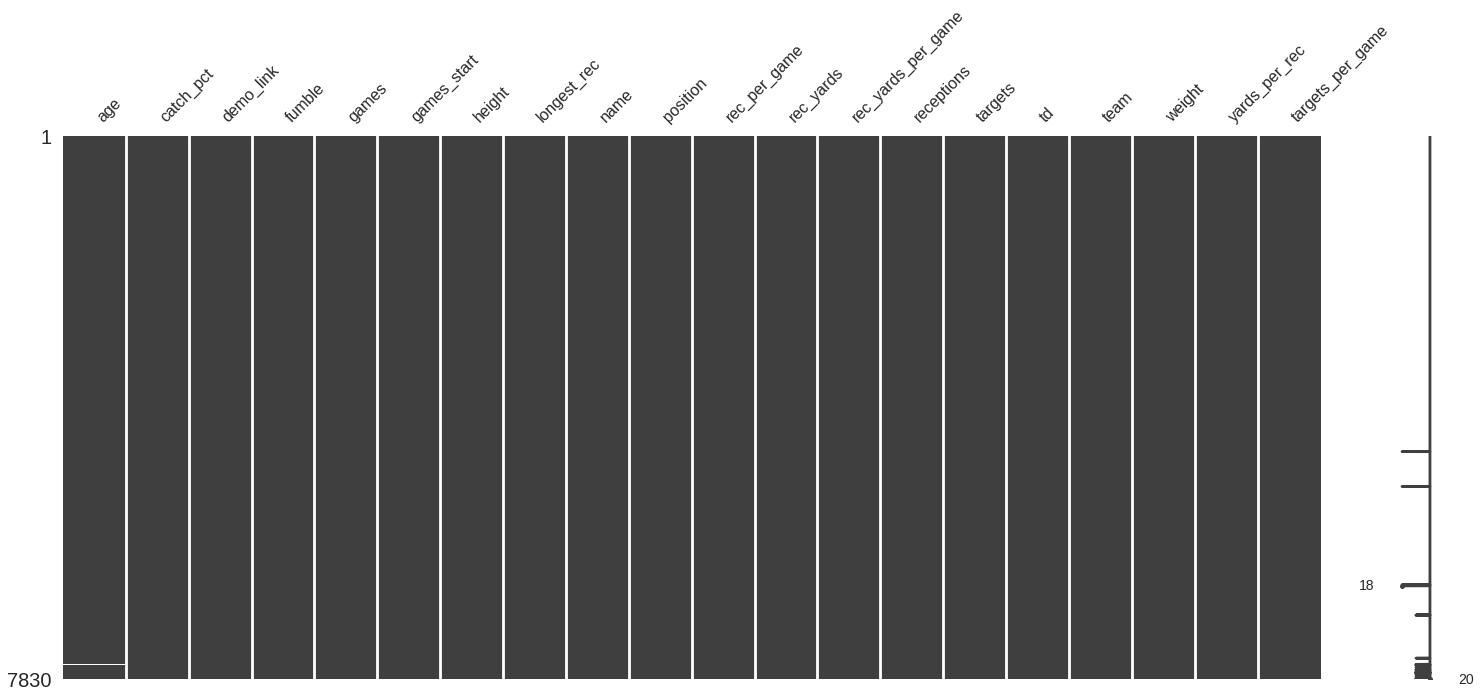

In [7]:
msno.matrix(df)

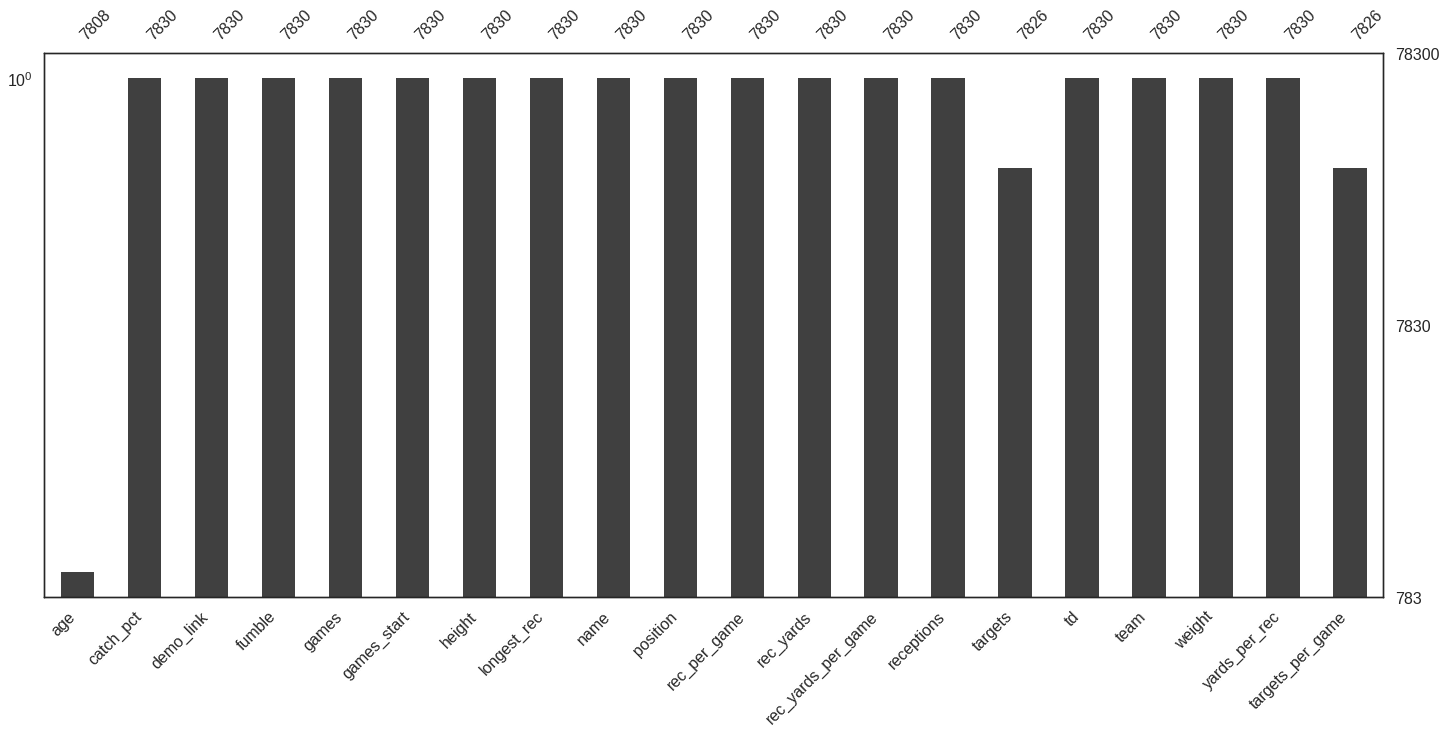

In [8]:
msno.bar(df, log=True, labels=True)

**Interactive pivot tables**

In [9]:
pivottablejs.pivot_ui(df)

**A thorough profile of the data**

In [10]:
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,7830
Total Missing (%),0.0%
Total size in memory,1.3 MiB
Average record size in memory,168.0 B
Numeric,13
Categorical,4
Date,0
Text (Unique),0
Rejected,4
Distinct count,23


I will have to decide on a certain set of filters for modeling, such as to only examine players who are true wide receiver position players vs. running backs or tight ends that get many targets or to only examine players with a minimum threshold of targets per game.

### Location and Spread

In [11]:
# a mapping for future printouts
cols = {'weight': 'Weight', 'height': 'Height', 'rec_per_game': "Receptions per Game",
     'yards_per_rec': 'Yards per Reception', 'catch_pct': 'Catch %',
     'targets_per_game': 'Targets per Game', 'rec_yards_per_game': 'Receiving Yards per Game',
       'td': 'Receiving Touchdowns'}

col_list = list(cols.keys())

In [12]:
# a quick look at some stats
df[col_list].describe()

,td,targets_per_game,yards_per_rec,rec_per_game,height,rec_yards_per_game,weight,catch_pct
count,7830.000000,7826.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000,7830.000000
mean,1.609195,2.879348,10.370179,1.785249,73.124521,20.263768,220.933589,65.361520
std,2.444796,2.581166,5.211456,1.589293,2.826430,21.204588,27.457719,17.763348
min,0.000000,0.000000,-16.000000,0.100000,65.000000,-5.000000,150.000000,0.000000
25%,0.000000,0.800000,7.200000,0.500000,71.000000,4.125000,200.000000,53.600000
50%,1.000000,2.000000,10.100000,1.300000,73.000000,12.300000,216.000000,64.300000
75%,2.000000,4.375000,13.000000,2.700000,75.000000,29.900000,244.000000,75.000000
max,23.000000,13.142857,81.000000,8.900000,80.000000,122.800000,336.000000,100.000000


The interquartile range for a few variables is quite small

### Shape

A look at the shapes of distributions based on skew and kurtosis:

In [13]:
df[col_list].apply(stats.skew)

td                    2.293141
targets_per_game           NaN
yards_per_rec         1.735189
rec_per_game          1.110845
height                0.043108
rec_yards_per_game    1.419464
weight                0.448494
catch_pct             0.183946
dtype: float64

In [14]:
df[col_list].apply(stats.kurtosis)

td                     6.445296
targets_per_game            NaN
yards_per_rec         14.531869
rec_per_game           0.645756
height                -0.737083
rec_yards_per_game     1.580229
weight                -0.098816
catch_pct              0.016496
dtype: float64

### Bivariate

Target variable is *yards_per_rec*

Create boxplots for individual features with `yards_per_rec` being the reponse/target variable.

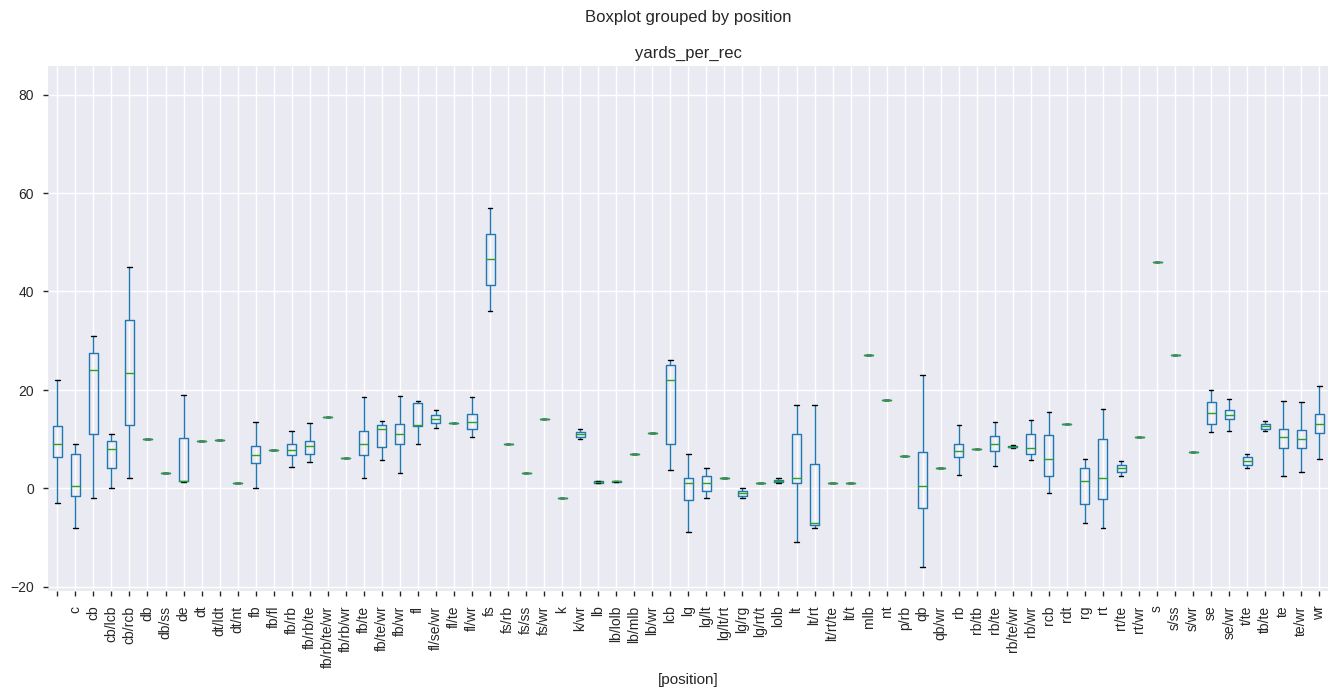

In [15]:
df[['yards_per_rec', 'position']].boxplot(by='position', figsize=(16,7), rot=90);

`fs` has a much higher `yards_per_rec` than other positions.

In [16]:
df['position'].value_counts()

wr             2258
               1972
te             1273
rb             1152
fb              520
fb/te           115
te/wr           106
qb               88
fb/rb            85
fb/wr            38
rb/wr            30
rb/te            24
lg               13
lt               12
c                12
fl/wr            10
se/wr             9
fb/te/wr          9
rg                6
fb/rb/te          6
rt                6
fl                5
lcb               5
se                4
cb                3
rcb               3
tb/te             3
cb/lcb            3
de                3
lt/rt             3
               ... 
lb/lolb           2
cb/rcb            2
mlb               1
s                 1
lt/rt/te          1
fb/rb/wr          1
lt/t              1
dt                1
lg/lt/rt          1
db                1
fs/wr             1
fl/te             1
dt/nt             1
fb/rb/te/wr       1
qb/wr             1
nt                1
rt/wr             1
lb/mlb            1
p/rb              1


Too much variation in positions. Need to map or consolidate in order to make this a usable feature.

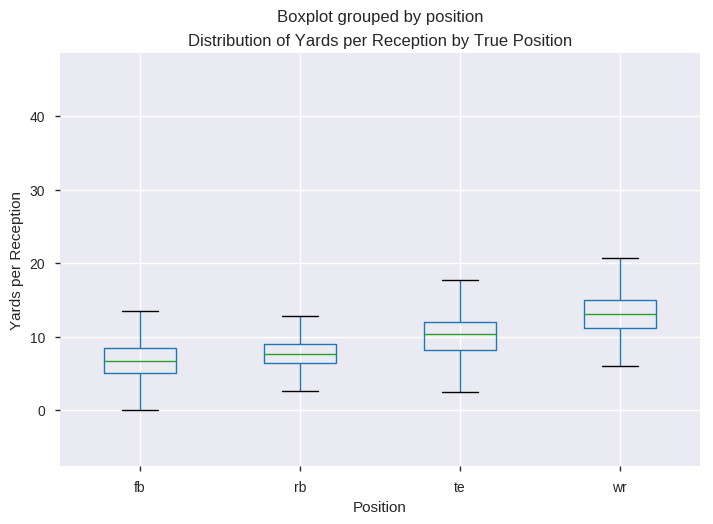

In [17]:
# a closer look at yards per reception for a few position
positions = ['wr', 'te', 'rb', 'fb']
filtered_positions = df.loc[df['position'].isin(positions)]

filtered_positions[['yards_per_rec', 'position']].boxplot(by='position')
plt.xlabel('Position')
plt.ylabel('Yards per Reception')
plt.title('Distribution of Yards per Reception by True Position');

In [18]:
df.columns

Index(['age', 'catch_pct', 'demo_link', 'fumble', 'games', 'games_start',
       'height', 'longest_rec', 'name', 'position', 'rec_per_game',
       'rec_yards', 'rec_yards_per_game', 'receptions', 'targets', 'td',
       'team', 'weight', 'yards_per_rec', 'targets_per_game'],
      dtype='object')

**Create scatter matrix to view all at once** (diagonla shows the histograms for each feature)

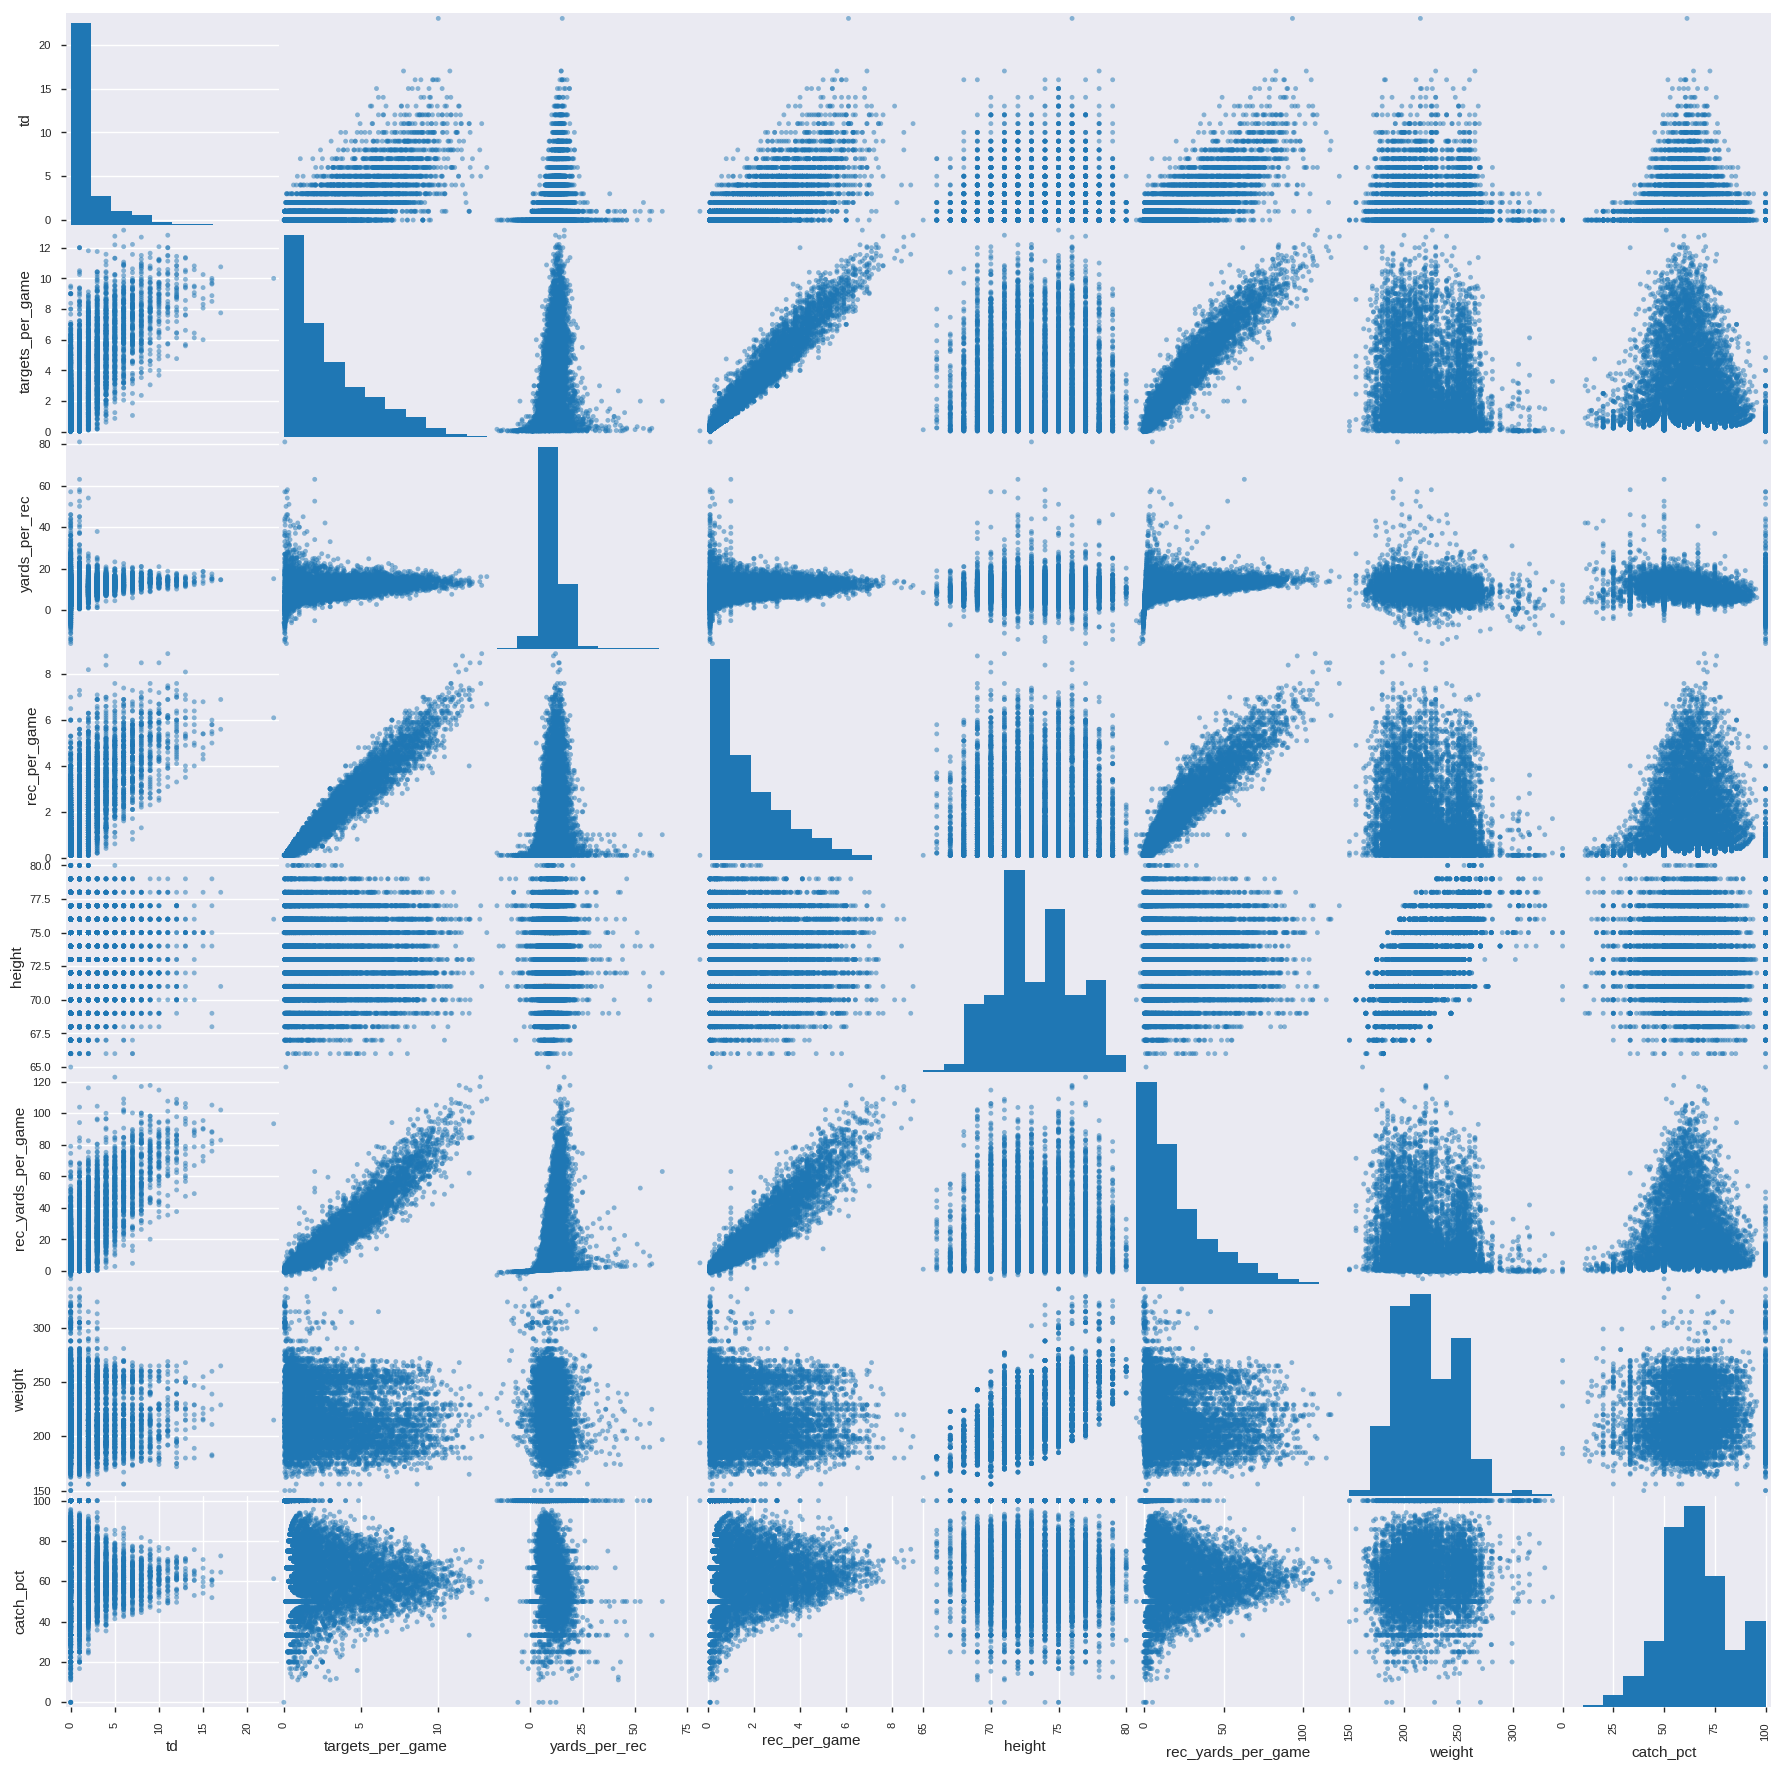

In [19]:
pd.plotting.scatter_matrix(df.loc[:, col_list], figsize=(22,22));

There are some notable relationships between various metrics, including positive relationships between the number of touchdowns and receptions per game.

### Multivariate

In [20]:
corr = df.corr()
print(corr)

                         age  catch_pct    fumble     games  games_start  \
age                 1.000000   0.009051 -0.019754  0.106893     0.210397   
catch_pct           0.009051   1.000000  0.157588 -0.057361    -0.026707   
fumble             -0.019754   0.157588  1.000000  0.215452     0.272474   
games               0.106893  -0.057361  0.215452  1.000000     0.491553   
games_start         0.210397  -0.026707  0.272474  0.491553     1.000000   
height              0.013543  -0.068846 -0.128248  0.038119     0.129798   
longest_rec         0.025664  -0.220727  0.076620  0.304634     0.424903   
rec_per_game        0.121664  -0.064004  0.145653  0.178351     0.579922   
rec_yards           0.113838  -0.148047  0.122557  0.388270     0.637208   
rec_yards_per_game  0.105116  -0.148511  0.081709  0.182211     0.555246   
receptions          0.132304  -0.080765  0.189832  0.430493     0.676089   
targets             0.129072  -0.194825  0.150233  0.425897     0.678440   
td          

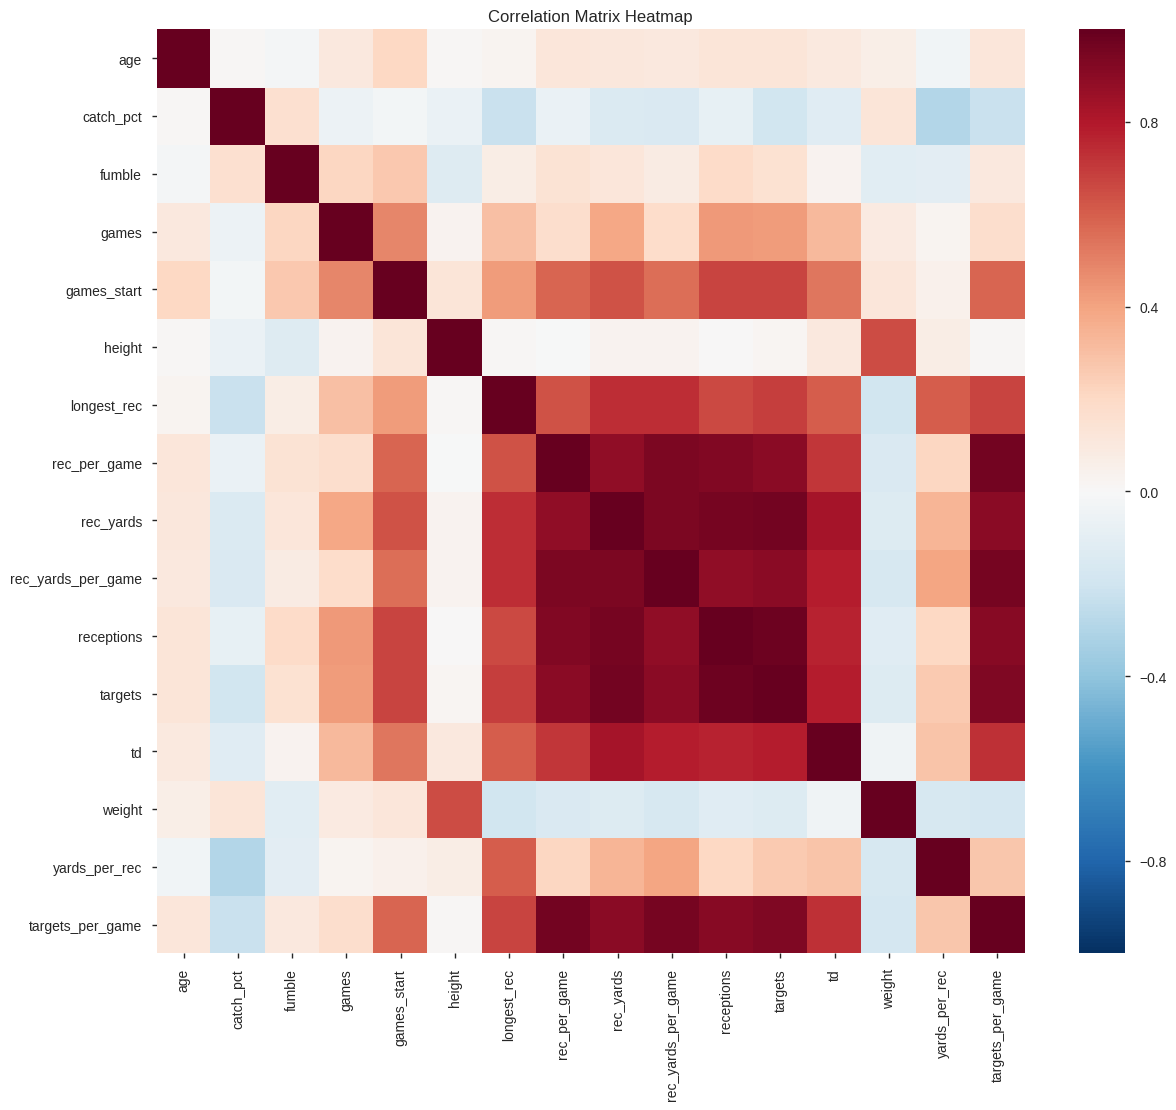

In [21]:
fig, ax = plt.subplots(figsize=(14,12));
sns.heatmap(corr, ax=ax);
plt.xlabel('');
plt.ylabel('');
plt.title('Correlation Matrix Heatmap');

## Inferential Analysis

Are taller players better?

In [22]:
df['height'].describe()

count    7830.000000
mean       73.124521
std         2.826430
min        65.000000
25%        71.000000
50%        73.000000
75%        75.000000
max        80.000000
Name: height, dtype: float64

In [23]:
# filter the data to get only records with a "targets" value of at least 3

# use .copy() to suppress setting with copy warnings when editing more_targets later
more_targets = df.loc[df['targets'] >= 3].copy()
more_targets.describe()

,age,catch_pct,fumble,games,games_start,height,longest_rec,rec_per_game,rec_yards,rec_yards_per_game,receptions,targets,td,weight,yards_per_rec,targets_per_game
count,7023.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000,7039.000000
mean,26.388865,62.726339,0.837335,12.739878,6.258133,73.104276,32.672255,1.956798,296.196761,22.291789,25.724677,41.666714,1.778236,220.107544,10.624563,3.167818
std,3.163201,15.162263,1.296088,3.924637,5.610751,2.819407,19.581763,1.584303,321.323481,21.386434,23.980190,38.994229,2.520640,26.502987,4.331838,2.562438
min,21.000000,11.100000,0.000000,1.000000,0.000000,66.000000,-4.000000,0.100000,-7.000000,-0.800000,1.000000,3.000000,0.000000,150.000000,-4.000000,0.187500
25%,24.000000,53.400000,0.000000,10.000000,1.000000,71.000000,17.000000,0.700000,61.000000,5.700000,7.000000,11.000000,0.000000,200.000000,7.600000,1.071429
50%,26.000000,63.200000,0.000000,14.000000,5.000000,73.000000,28.000000,1.500000,170.000000,14.500000,18.000000,28.000000,1.000000,215.000000,10.300000,2.384615
75%,28.000000,72.300000,1.000000,16.000000,11.000000,75.000000,45.000000,2.900000,424.000000,32.500000,38.000000,61.000000,2.000000,243.000000,13.100000,4.687500
max,42.000000,100.000000,11.000000,17.000000,16.000000,80.000000,99.000000,8.900000,1964.000000,122.800000,143.000000,205.000000,23.000000,336.000000,58.000000,13.142857


In [24]:
# create a column to classify people as tall or not (tall must be at least 75 inches)
more_targets['tall'] = more_targets.loc[:, 'height'].apply(lambda x: 1 if x >= 75.0 else 0)
more_targets.head().T

index,0,1,2,3,4
age,28,27,32,30,27
catch_pct,60.4,65.4,67.8,57.8,66.4
demo_link,/players/H/HarrMa00.htm,/players/M/MuhaMu00.htm,/players/M/McCaEd00.htm,/players/S/SmitRo01.htm,/players/O/OwenTe00.htm
fumble,2,1,0,1,3
games,16,16,16,16,14
games_start,16,16,16,16,13
height,77,70,74,75,72
longest_rec,78,36,61,49,69
name,Marvin Harrison,Muhsin Muhammad,Ed McCaffrey,Rod Smith,Terrell Owens
position,wr,wr,wr,wr,wr


In [25]:
# look at the proportion of tall players
N = len(more_targets)
len(more_targets[more_targets.tall == 1]) / N

0.3462139508452905

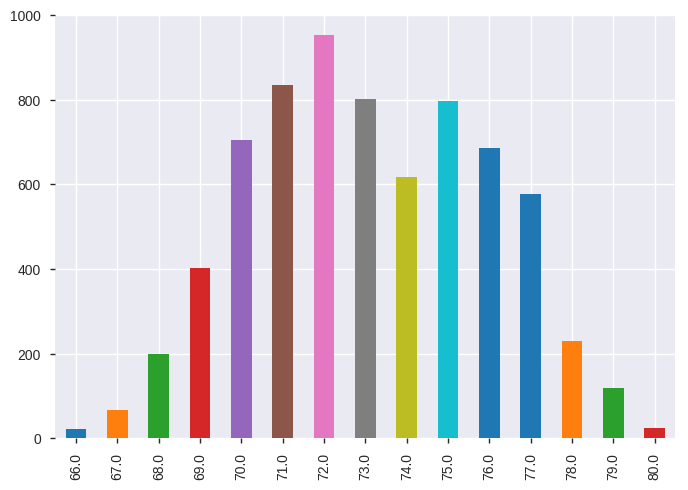

In [26]:
# bar plot to see the distribution of heights
more_targets.height.value_counts().sort_index().plot.bar();

In [27]:
from pandas import Series

# look at percentiles for yards per reception for each group
more_targets.groupby('tall').yards_per_rec.quantile([0.25, 0.5, 0.75, 0.9]).unstack()

,0.25,0.5,0.75,0.9
tall,,,,
0,7.2,10.0,13.0,15.5
1,8.4,11.0,13.3,15.9


In [28]:
# stats for height comparisons between tall/not-tall
h_stats = more_targets.groupby('tall').yards_per_rec.describe()
h_stats

,count,mean,std,min,25%,50%,75%,max
tall,,,,,,,,
0,4602.0,10.345241,4.401299,-4.0,7.2,10.0,13.0,58.0
1,2437.0,11.152031,4.147416,-4.0,8.4,11.0,13.3,45.0


The mean values don't initially appear to be significantly different between the two groups, but hypothesis tests will say for sure.

Calculate the conditional probability of achieving reception yards greater than n standard deviations from the mean, given (tall, not-tall).

In [29]:
# Bayes Theorem
# Calculate probability of yards more than n standard devaiations from the average

import numpy as np

yards_mean = more_targets['yards_per_rec'].mean()
yards_stdev = more_targets['yards_per_rec'].std()

std_means = []  # list for results
# iterate from 1.5 to 3 std from mean
for n in np.linspace(1.5, 3, 4):
    std_means.append(yards_mean + n*yards_stdev)

N = len(more_targets)
# compute unconditional probabilities
p_yards = [len(more_targets[more_targets.yards_per_rec > sm]) / N  for sm in std_means]
p_tall = more_targets.tall.value_counts() / N

# P(height-group | yards > mean + n*std)
p_tall_yards = [(more_targets[more_targets.yards_per_rec > sm].tall.value_counts() 
                  / len(more_targets[more_targets.yards_per_rec > sm]))
                for sm in std_means]

# P(yards > mean + n*std | height-group)
p_yards_tall = [pty*py/p_tall for pty,py in zip(p_tall_yards, p_yards)]

In [30]:
# iterate through results and print
for i,pyt in zip(np.linspace(1.5, 3, 4), p_yards_tall):
    print('std multiplier: {}\n'.format(i))
    print(pyt, '\n', 10*'-', '\n')

std multiplier: 1.5

0    0.052151
1    0.058268
Name: tall, dtype: float64 
 ---------- 

std multiplier: 2.0

0    0.023903
1    0.030776
Name: tall, dtype: float64 
 ---------- 

std multiplier: 2.5

0    0.011517
1    0.016414
Name: tall, dtype: float64 
 ---------- 

std multiplier: 3.0

0    0.008257
1    0.010259
Name: tall, dtype: float64 
 ---------- 



The probability of achieving yards per reception beyond the mean is much more favorable for taller players for values >= 2.0 std from the mean.

Create plots for the Probability Mass Function and Cumulative Distribution Function for the binomial distribution of tall players.

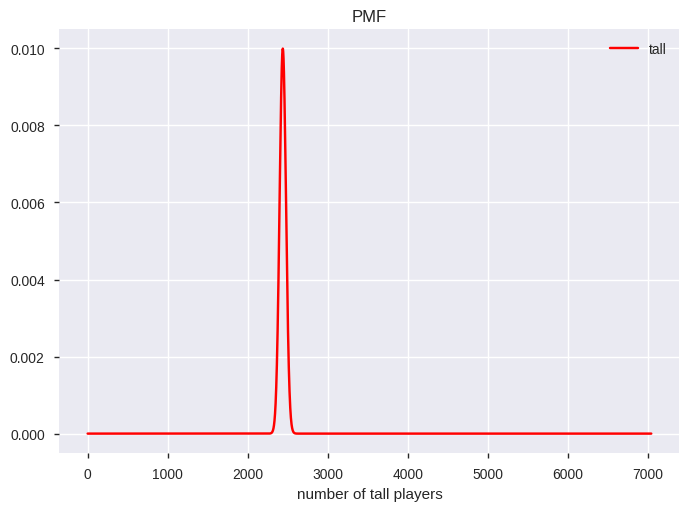

In [31]:
# Graph PMF / CDF

N = len(more_targets)
mean = more_targets[['tall']].mean()
y = []

for i in range(N):
    myBinom = stats.binom(n = N, p = mean)
    y.append(myBinom.pmf(i))

    
plt.plot(y, 'r', label = 'tall')
plt.legend()
plt.xlabel('number of tall players')
plt.title('PMF')
plt.show()

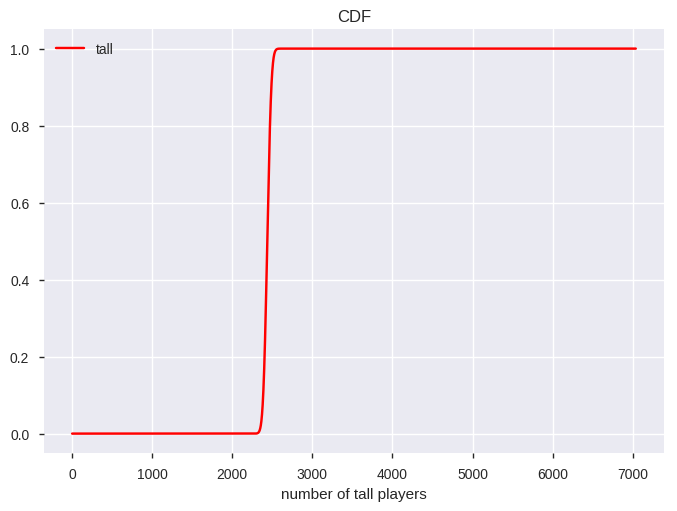

In [32]:
y = []

for i in range(N):
    myBinom = stats.binom(n = N, p = mean)
    y.append(myBinom.cdf(i))

plt.plot(y, 'r', label = 'tall')
plt.legend()
plt.xlabel('number of tall players')
plt.title('CDF')
plt.show()

In [33]:
# Expected number of tall players
# This of course is the same as the actual number of tall players in the data
# since the mean was computed from it.
(mean * N)[0], more_targets.tall.sum()

(2437.0, 2437)

In [34]:
col_list

['td',
 'targets_per_game',
 'yards_per_rec',
 'rec_per_game',
 'height',
 'rec_yards_per_game',
 'weight',
 'catch_pct']

### Confidence intervals for various metric means by height-group

In [35]:
# get 95% confidence intervals for tall and short yards_per_rec mean
import statsmodels.stats.api as sm

{'tall': sm.DescrStatsW(more_targets[more_targets.tall == 1].yards_per_rec).zconfint_mean(alpha = 0.025),
 'short': sm.DescrStatsW(more_targets[more_targets.tall ==0].yards_per_rec).zconfint_mean(alpha = 0.025)}

/home/michaelcrown/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


{'short': (10.199820088785124, 10.490662310171853),
 'tall': (10.963722766354199, 11.340339605414368)}

The above confidence intervals have zero overlap, and tall has a notably higher mean. Let's look at all metrics in `col_list`.

In [36]:
# print 95% confidence intervals for tall and short mean values for all attributes in col_list
for col in col_list:
    tall_z = sm.DescrStatsW(more_targets[more_targets.tall == 1][col]).zconfint_mean(alpha = 0.025)
    short_z = sm.DescrStatsW(more_targets[more_targets.tall == 0][col]).zconfint_mean(alpha = 0.025)
    print(col)
    print("short", short_z)
    print("tall", tall_z)
    print('------')

td
short (1.4799494803923359, 1.6330448698901499)
tall (2.06893995033075, 2.324987009045532)
------
targets_per_game
short (3.035073582819626, 3.2004328012928607)
tall (3.1411244058657415, 3.3835943350204181)
------
yards_per_rec
short (10.199820088785124, 10.490662310171853)
tall (10.963722766354199, 11.340339605414368)
------
rec_per_game
short (1.8905458822518411, 1.9928960994952243)
tall (1.9103931294588496, 2.0601444167044667)
------
height
short (71.360247442415371, 71.478083717949701)
tall (76.231451934783266, 76.34138351864307)
------
rec_yards_per_game
short (20.849236832995494, 22.218342480346557)
tall (22.700295753822637, 24.746072732020622)
------
weight
short (207.89439921639149, 209.27378852806743)
tall (240.87167598911165, 242.86488535680544)
------
catch_pct
short (63.080541785069116, 64.108723751654026)
tall (60.440031349101531, 61.733296513024015)
------


**Findings**

* Short players have a substantially higher catch percentage, but they have lower `yards_per_rec` and lower `rec_yards_per_game`.
* Tall players have a much higher interval of touchdowns
* Unsurprisingly, tall players tend to weigh a lot more

### Hypothesis tests to determine statistical significance

We need to choose a level of significance *before* performing tests. Let's go with an alpha of 0.01.

In [37]:
# perform two-sided t-test for the two samples (tall, targets_per_game)
stats.ttest_ind(more_targets[more_targets.tall == 0].targets_per_game,  
          more_targets[more_targets.tall == 1].targets_per_game, 
          equal_var = False)  

Ttest_indResult(statistic=-2.2087474458092702, pvalue=0.02724037533367045)

Since the p-value above is greater than alpha, we accept the null hypothesis that the mean targets per game is the same for both height groups.

In [38]:
# perform independent t-tests for all metrics in col_list
for col in col_list:
    two_sided_t = stats.ttest_ind(more_targets[more_targets.tall == 0][col],  
          more_targets[more_targets.tall == 1][col], 
          equal_var = False)  
    
    print(col)
    print(two_sided_t)
    print('------')

td
Ttest_indResult(statistic=-9.6239938232943807, pvalue=1.0582716073003908e-21)
------
targets_per_game
Ttest_indResult(statistic=-2.2087474458092702, pvalue=0.02724037533367045)
------
yards_per_rec
Ttest_indResult(statistic=-7.6005311565216145, pvalue=3.4747167490089918e-14)
------
rec_per_game
Ttest_indResult(statistic=-1.0762453446662614, pvalue=0.28187278145861805)
------
height
Ttest_indResult(statistic=-135.3925947290046, pvalue=0.0)
------
rec_yards_per_game
Ttest_indResult(statistic=-3.9870348169442469, pvalue=6.7938199162148591e-05)
------
weight
Ttest_indResult(statistic=-61.554780708610927, pvalue=0.0)
------
catch_pct
Ttest_indResult(statistic=6.8047963017086612, pvalue=1.1225814241519213e-11)
------


**Findings:**

- Taller players obviously differ in height and weight compared to shorter players
- Taller players have significantly more receiving yards per game, yards per reception
- There is not a statistically significant difference in the mean number of targers per game
- Shorter players have a higher mean catch percentage
- There is not a statistically significant difference in the mean number of receptions per game
- The mean number of touchdowns for taller players is significanly greater

## Regression Analysis

Goal is to predict number of touchdowns in a season.

In [39]:
nfl_df = more_targets.copy()
# Transpose for a cleaner look at all columns
nfl_df.head(4).T

index,0,1,2,3
age,28,27,32,30
catch_pct,60.4,65.4,67.8,57.8
demo_link,/players/H/HarrMa00.htm,/players/M/MuhaMu00.htm,/players/M/McCaEd00.htm,/players/S/SmitRo01.htm
fumble,2,1,0,1
games,16,16,16,16
games_start,16,16,16,16
height,77,70,74,75
longest_rec,78,36,61,49
name,Marvin Harrison,Muhsin Muhammad,Ed McCaffrey,Rod Smith
position,wr,wr,wr,wr


Drop some columns that are of no use for modeling:

* `demo_link`
* `name`
* `team` (we're predicting total touchdowns in a season, not by team)
* `position`

In [40]:
nfl_df = nfl_df.drop(['demo_link', 'name', 'team', 'position'], axis=1)

In [41]:
print(nfl_df.shape)
nfl_df.head().T

(7039, 17)


index,0,1,2,3,4
age,28.0000,27.00,32.0000,30.0000,27.000000
catch_pct,60.4000,65.40,67.8000,57.8000,66.400000
fumble,2.0000,1.00,0.0000,1.0000,3.000000
games,16.0000,16.00,16.0000,16.0000,14.000000
games_start,16.0000,16.00,16.0000,16.0000,13.000000
height,77.0000,70.00,74.0000,75.0000,72.000000
longest_rec,78.0000,36.00,61.0000,49.0000,69.000000
rec_per_game,6.4000,6.40,6.3000,6.3000,6.900000
rec_yards,1413.0000,1183.00,1317.0000,1602.0000,1451.000000
rec_yards_per_game,88.3000,73.90,82.3000,100.1000,103.600000


## Modeling

### Model 1 (bivariate model)

In [42]:
import warnings

# this is for if you're using pandas 0.20+
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

Create a bivariate linear model using OLS. The from formula takes a string:
The formula is telling the model that `td` is the dependent variable and it's proportional to `targets_per_game`.

In [43]:
# Simple regression
lm = sm.OLS.from_formula('td ~ targets_per_game', nfl_df)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     7478.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        22:59:10   Log-Likelihood:                -13947.
No. Observations:                7039   AIC:                         2.790e+04
Df Residuals:                    7037   BIC:                         2.791e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4584      0.033  

The R-squared tells us this model is accounting for only 51.5% of the variance in the number of touchdowns, and the Prob (F-statistic) is our p-value: being effectively zero tells us the coefficient for our independent variable is not zero (i.e. there is a relationship).

The 95% confidence intevals are reasonably narrow for the coefficients, particularly for `targets_per_game`, but obviously the intercept would not be negative in reality (negative toucdowns) so let's remove that from future models.

In [44]:
# extract and show a couple stats from the modeling
print(result.rsquared, result.fvalue, '\n')

# print the formula with coefficients
print('td = {} + {}*targets_per_game'.format(result.params.Intercept, result.params.targets_per_game))

0.515195074478 7478.11655419 

td = -0.45844324517092383 + 0.706062937617006*targets_per_game


This simple model tells us to expect roughly an additional 2 touchdowns for every three targets per game.

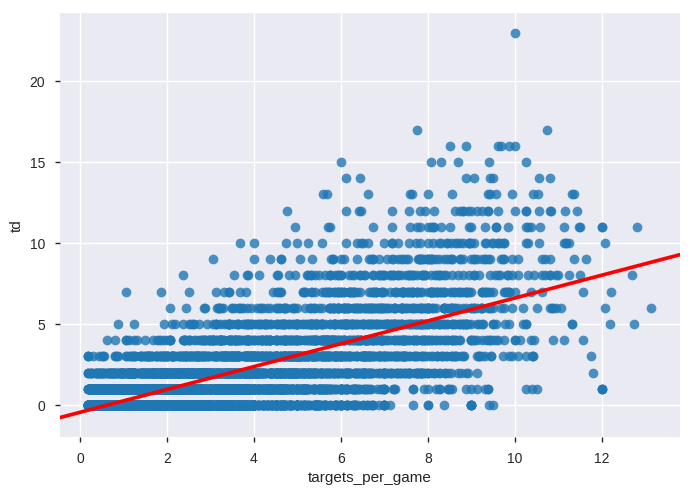

In [45]:
# plot the regression line
sns.regplot('targets_per_game', 'td', nfl_df, line_kws = {"color":"r"}, ci=None);

### Residuals Analysis

**Pearson residuals** are residuals divided by the standard deviation of the observations. These are not fully standardized.

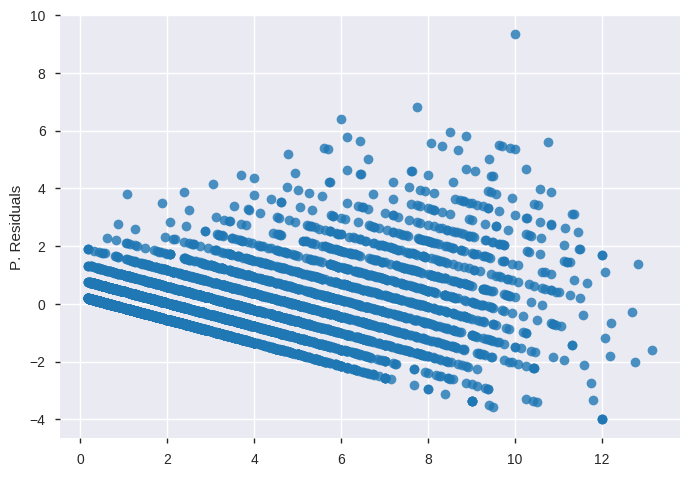

In [46]:
# plot pearson residuals of the model
fitted_values = nfl_df.targets_per_game.values
p_residuals = pd.Series(result.resid_pearson, name="P. Residuals")
sns.regplot(fitted_values, p_residuals,  fit_reg=False);

The residuals are distributed in a fairly random fashion, and we certainly don't seem to have any curvature, but there is some heteroskedasticity. This last aspect is something we don't want for standard linear models, but it isn't too extreme.

### Q-Q Plot

Quantile-quantile plots give us a better idea of how well residuals fit a particular distribution. We're interested in either normal or t-distributions when performing diagnostics on OLS, so let's look at both of those.

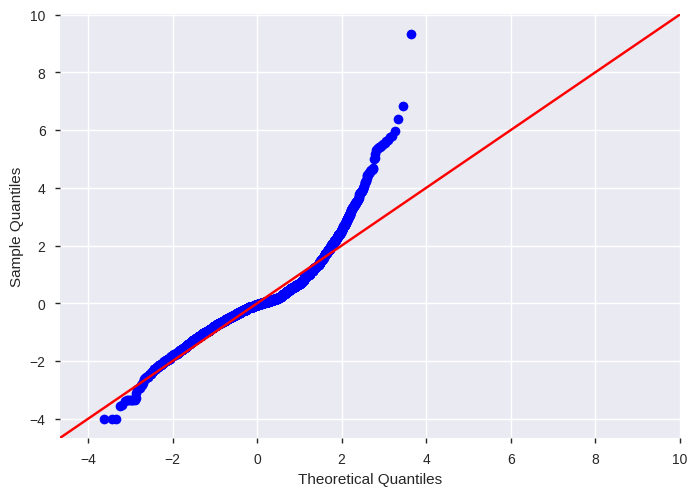

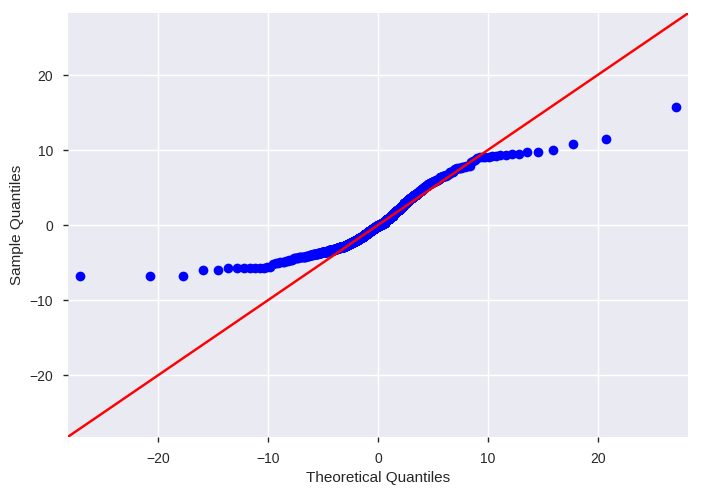

In [47]:
qq_n = sm.graphics.qqplot(p_residuals, line='45', fit=True)
qq_t = sm.graphics.qqplot(p_residuals, dist=stats.t, line='45', fit=True)

The plots above suggest a narrow hump to the distribution of residuals, with some slight skew. This can be verified with a histogram:

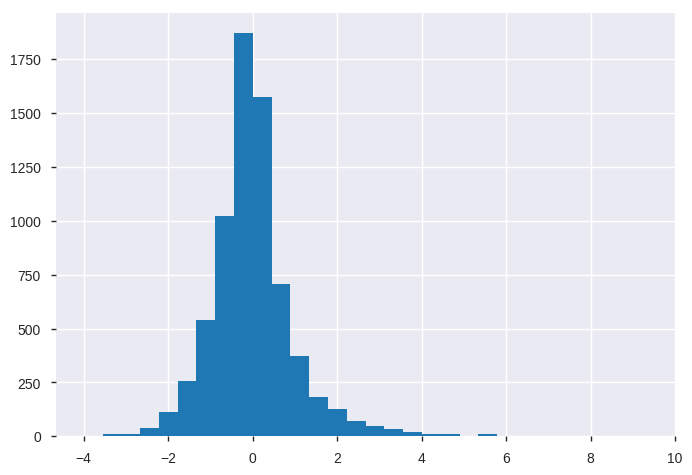

In [48]:
plt.hist(p_residuals, bins=30);

### Cooks Distance

This is a measure of influence that helps to identify influential points. A common cutoff to determine influence is 4/n, where n is number of observations.

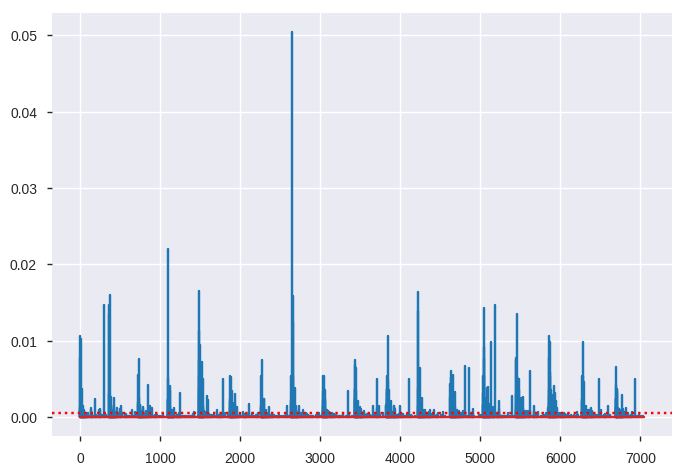

In [49]:
influence = result.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
cutoff = 4/len(c)
plt.stem(np.arange(len(c)), c, markerfmt=',')
# plot cutoff
plt.axhline(cutoff, color='r', linestyle=':');

Clearly this rule leaves us with lots of influential points (which indeed we might have), so it may need to be adjusted.

### Residuals vs Leverage

Let's take a look at how outliers are affecting the regression. A guideline for high leverage is 2.5(k+1)/n, where k is the number of prdictors.

In [50]:
# high leverage cutoff
cutoff = 2.5*2/7039
cutoff

0.0007103281716152863

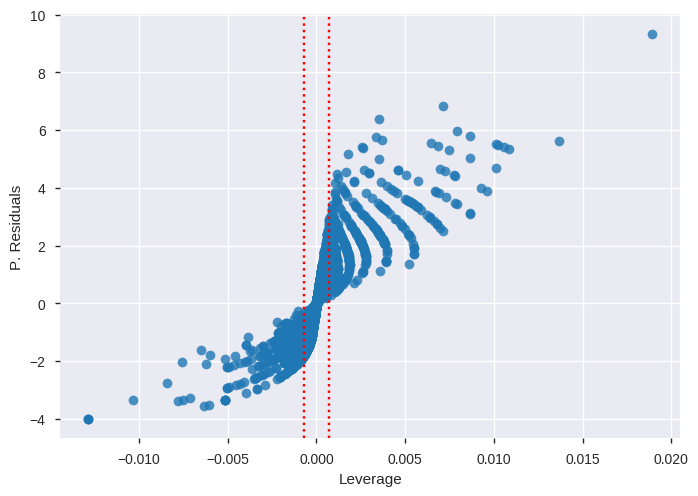

In [52]:
from statsmodels.stats.outliers_influence import OLSInfluence
# plot the influence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
fig = sns.regplot(leverage, p_residuals,  fit_reg=False)
# plot cutoff lines
for c in [-cutoff, cutoff]:
    plt.axvline(c, color='r', linestyle=':');

Again, we're left with quite a few high-leverage points.

## Model 2 (two predictors and no intercept)

Subtracting 1 in the end of the formula string removes the intercept from the model

In [53]:
# use two predictors
lm = sm.OLS.from_formula('td ~ targets_per_game + rec_yards_per_game - 1', nfl_df)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     9677.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        22:59:32   Log-Likelihood:                -13265.
No. Observations:                7039   AIC:                         2.653e+04
Df Residuals:                    7037   BIC:                         2.655e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
targets_per_game      -0.2475      0

We can see this gives us a much better result, with the model accounting for 73.3% of the variation in the response. But we can likely do better using all predictors.

## Model 3 (all predictors)

In [54]:
# All columns (except response)
lm = sm.OLS.from_formula('td ~ ' + '+'.join(nfl_df.columns.difference(['td'])) + '-1', nfl_df)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1735.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        22:59:32   Log-Likelihood:                -12258.
No. Observations:                7023   AIC:                         2.455e+04
Df Residuals:                    7007   BIC:                         2.466e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                   -0.0063      0

Obviously a big improvement. Now it's time to see a couple models with interaction terms.

In [55]:
# Interaction terms
print(sm.OLS.from_formula('td ~ ' + '+'.join(nfl_df.columns.difference(['td'])) + ' + targets*rec_yards - 1', nfl_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1636.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        22:59:32   Log-Likelihood:                -12253.
No. Observations:                7023   AIC:                         2.454e+04
Df Residuals:                    7006   BIC:                         2.466e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                   -0.0070      0

In [56]:
# Non-linear transformations
print(sm.OLS.from_formula('td ~ ' + '+'.join(nfl_df.columns.difference(['td'])) + ' + np.square(rec_yards) - 1', nfl_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1637.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        22:59:32   Log-Likelihood:                -12251.
No. Observations:                7023   AIC:                         2.454e+04
Df Residuals:                    7006   BIC:                         2.465e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                     -0.0071 

Neither of these resulted in a big improvement to the model, but since there are so many possible interaction terms, one idea is to write a function to model all possible combinations of interaction terms, within reason.

## Best Subset Selection

In [57]:
# split data into response and predictors
y = nfl_df.td
X = nfl_df.drop(['td', 'catch_pct', 'age', 'targets_per_game', 'rec_yards_per_game',
             'rec_per_game', 'height'], axis=1)

In [58]:
import itertools
import time

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

# get best features combination
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    # iterate over all possible k-sized combinations of features
    # then model each and append results
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [59]:
models = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()

# iterate over combination sizes 1 to 10
for i in range(1, 11):
    models.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  10 models on 1 predictors in 0.01887679100036621 seconds.
Processed  45 models on 2 predictors in 0.13437247276306152 seconds.
Processed  120 models on 3 predictors in 0.32379722595214844 seconds.
Processed  210 models on 4 predictors in 0.5901436805725098 seconds.
Processed  252 models on 5 predictors in 1.1086595058441162 seconds.
Processed  210 models on 6 predictors in 0.7547986507415771 seconds.
Processed  120 models on 7 predictors in 0.4894728660583496 seconds.
Processed  45 models on 8 predictors in 0.1873149871826172 seconds.
Processed  10 models on 9 predictors in 0.07738637924194336 seconds.
Processed  1 models on 10 predictors in 0.005440473556518555 seconds.
Total elapsed time: 3.712190866470337 seconds.


In [60]:
models.sort_values(by='RSS')

,RSS,model
10,13514.066136,<statsmodels.regression.linear_model.Regressio...
9,13518.123285,<statsmodels.regression.linear_model.Regressio...
8,13525.576353,<statsmodels.regression.linear_model.Regressio...
7,13554.033189,<statsmodels.regression.linear_model.Regressio...
6,13573.863670,<statsmodels.regression.linear_model.Regressio...
5,13615.569871,<statsmodels.regression.linear_model.Regressio...
4,13667.336302,<statsmodels.regression.linear_model.Regressio...
3,13868.652808,<statsmodels.regression.linear_model.Regressio...
2,14016.812265,<statsmodels.regression.linear_model.Regressio...
1,14387.697190,<statsmodels.regression.linear_model.Regressio...


In [61]:
print(models.loc[10, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     2781.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        22:59:36   Log-Likelihood:                -12284.
No. Observations:                7039   AIC:                         2.459e+04
Df Residuals:                    7029   BIC:                         2.466e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
fumble           -0.1252      0.014     -8.901

Text(0,0.5,'BIC')

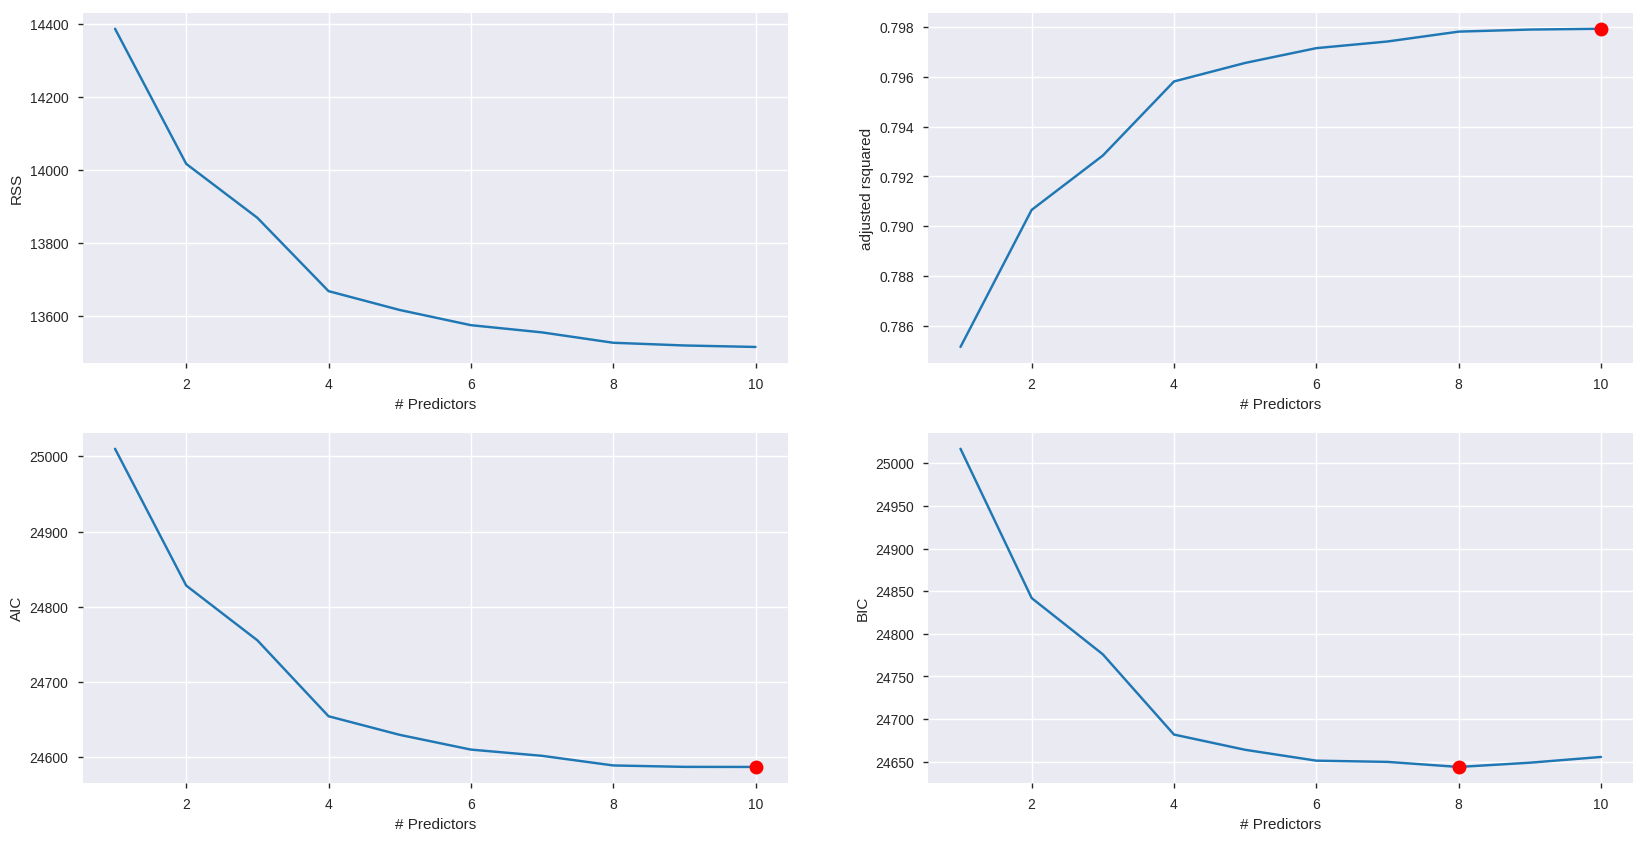

In [62]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The idxmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The idxmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [63]:
# create train and test set indices for train/test splits
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True)
test = np.invert(train)

### Functions for forward selection

In [64]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train, X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {"model":regr, "RSS":RSS, 'features': feature_set}

def forward(predictors, X_train, y_train, X_test, y_test):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors + [p], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [65]:
models_train = pd.DataFrame(columns=["RSS", "model", 'features'])

predictors = []

for i in range(1,len(X.columns)+1):    
    models_train.loc[i] = forward(predictors, X[train], y[train], X[test], y[test])
    predictors = models_train.loc[i]["model"].model.exog_names

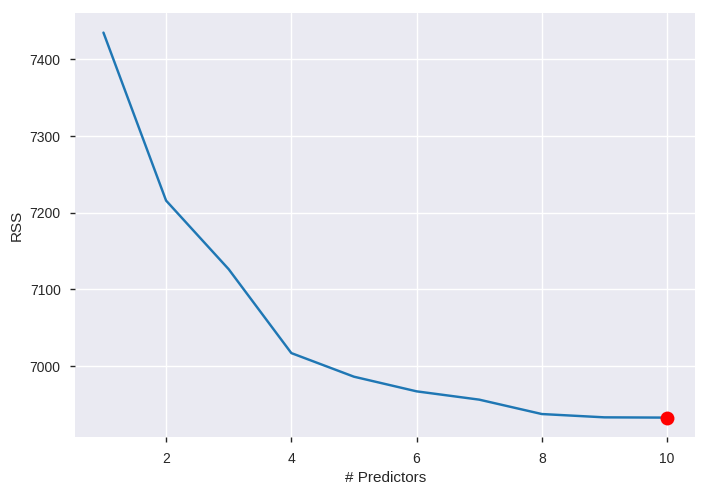

In [66]:
plt.plot(models_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_train["RSS"].idxmin(), models_train["RSS"].min(), "or");

In [67]:
models_train

,RSS,model,features
1,7434.650023,<statsmodels.regression.linear_model.Regressio...,[rec_yards]
2,7215.661653,<statsmodels.regression.linear_model.Regressio...,"[rec_yards, fumble]"
3,7126.159991,<statsmodels.regression.linear_model.Regressio...,"[rec_yards, fumble, targets]"
4,7016.845340,<statsmodels.regression.linear_model.Regressio...,"[rec_yards, fumble, targets, tall]"
5,6986.048246,<statsmodels.regression.linear_model.Regressio...,"[rec_yards, fumble, targets, tall, yards_per_rec]"
6,6966.957728,<statsmodels.regression.linear_model.Regressio...,"[rec_yards, fumble, targets, tall, yards_per_r..."
7,6956.141593,<statsmodels.regression.linear_model.Regressio...,"[rec_yards, fumble, targets, tall, yards_per_r..."
8,6937.370645,<statsmodels.regression.linear_model.Regressio...,"[rec_yards, fumble, targets, tall, yards_per_r..."
9,6933.057650,<statsmodels.regression.linear_model.Regressio...,"[rec_yards, fumble, targets, tall, yards_per_r..."
10,6932.709260,<statsmodels.regression.linear_model.Regressio...,"[rec_yards, fumble, targets, tall, yards_per_r..."


In [68]:
print(models_train.loc[10, 'model'].summary())

                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1351.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        22:59:37   Log-Likelihood:                -6125.8
No. Observations:                3539   AIC:                         1.227e+04
Df Residuals:                    3529   BIC:                         1.233e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
rec_yards         0.0087      0.000     25.723

This gives a slightly lower R-squared compared to other methods, but we have much better AIC and BIC values. Let's perform a quick backward selection, removing features based on p-values:

## Other Ideas

- Look at other positions
- Look at other attributes
- Time series forecasting with week-by-week data